In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
import scipy as sp
from sklearn.linear_model import LinearRegression

In [ ]:
participant_data = pd.read_csv('/redacted/path/demographics.csv')
age = np.array(participant_data.age)
sex = np.array(participant_data.sex)
participantid = np.array(participant_data.ID)

In [ ]:
metrics = ['volume']
hemi = ['L','R']
metrichold = np.empty((7262,2,len(participantid),len(metrics)))

### Load in subfield volume CSV files

In [ ]:
for ii in range(len(participantid)):
    if ii == 0:
        df = pd.read_csv(f'/redacted/path/hippunfold/hippunfold/sub-{participantid[ii]}/anat/sub-{participantid[ii]}_space-cropT1w_desc-subfields_atlas-bigbrain_volumes.tsv',sep='\t')
    else:
        dfhold = pd.read_csv(f'/redacted/path/hippunfold/hippunfold/sub-{participantid[ii]}/anat/sub-{participantid[ii]}_space-cropT1w_desc-subfields_atlas-bigbrain_volumes.tsv',sep='\t')
        df = pd.concat([df,dfhold], ignore_index = True) 

In [ ]:
# Add age and sex into dataframe (repeat twice because of hemispheres)
df['age'] = np.repeat(age,2)
df['sex'] = np.repeat(sex,2)

In [ ]:
# Combine DG and CA4 to match surface analyses
df['DG/CA4'] = (df.DG + df.CA4) / 2

In [ ]:
# Drop unused volumes
df = df.drop(['SRLM','Cyst','DG','CA4'],axis=1)

In [ ]:
dfplot = pd.melt(df,id_vars=['age','subject','sex','hemi'])

### Averaging hemispheres

In [ ]:
for ii in range(len(participantid)):
    if ii == 0:
        dfhold = pd.read_csv(f'/redacted/path/hippunfold/hippunfold/sub-{participantid[ii]}/anat/sub-{participantid[ii]}_space-cropT1w_desc-subfields_atlas-bigbrain_volumes.tsv',sep='\t')
        avghold = np.nanmean(dfhold[['Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst']], axis=0)
        df = {"subject": [dfhold['subject'].values[0]], 'Sub':[avghold[0]],'CA1':[avghold[1]],'CA2':[avghold[2]],'CA3':[avghold[3]],'CA4':[avghold[4]],'DG':[avghold[5]],'SRLM':[avghold[6]],'Cyst':[avghold[7]]}
        df = pd.DataFrame(data=df)
    else:
        dfhold = pd.read_csv(f'/redacted/path/hippunfold/hippunfold/sub-{participantid[ii]}/anat/sub-{participantid[ii]}_space-cropT1w_desc-subfields_atlas-bigbrain_volumes.tsv',sep='\t')
        avghold = np.nanmean(dfhold[['Sub','CA1','CA2','CA3','CA4','DG','SRLM','Cyst']], axis=0)
        dfavg = {"subject": [dfhold['subject'].values[0]], 'Sub':[avghold[0]],'CA1':[avghold[1]],'CA2':[avghold[2]],'CA3':[avghold[3]],'CA4':[avghold[4]],'DG':[avghold[5]],'SRLM':[avghold[6]],'Cyst':[avghold[7]]}
        dfavg = pd.DataFrame(data=dfavg)
        df = pd.concat([df,dfavg], ignore_index = True) 

In [ ]:
# Overall hippocampus volume
df['total'] = df['Sub'] + df['CA1'] +df['CA2'] + df['CA3'] + df['SRLM'] + df['DG/CA4']

### This is the data provided in the dataset excel sheet provided with the manuscript

In [ ]:
df['age'] = age
df['sex'] = sex
df['DG/CA4'] = (df.DG + df.CA4) / 2

df = df.drop(['SRLM','Cyst','DG','CA4'],axis=1)
dfplot = pd.melt(df,id_vars=['age','subject','sex'])

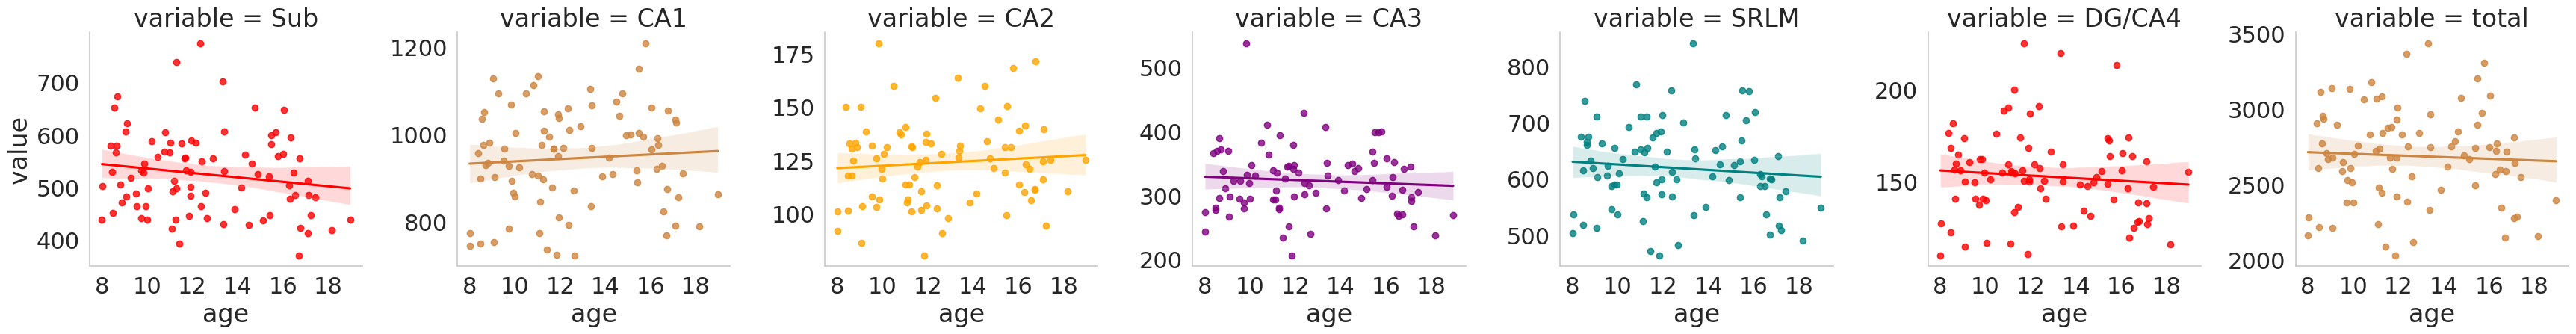

In [ ]:
flatui = ["red","peru", "orange","purple","teal"]
sns.set_palette(sns.color_palette(flatui))
palette=sns.color_palette(flatui)

sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})

lm = sns.lmplot(x="age", y='value', data=dfplot,col='variable',hue='variable',palette=palette,order=1,facet_kws={'sharey': False,'sharex':True})
plt.xticks([8,10,12,14,16,18]) 
plt.show()

### Pearson's R of subfield volumes with age

In [ ]:
Rhold = np.empty((5,len(metrics)))
phold = np.empty((5,len(metrics)))
labels = ['Sub','CA1','CA2','CA3','DG/CA4']


for ii in range(5):
    for jj in range(len(metrics)):
        Y = dfplot[dfplot['variable']==f'{labels[ii]}']['value'].values
        X = dfplot[dfplot['variable']==f'{labels[ii]}']['age'].values
        corr = sp.stats.pearsonr(X,Y)
        Rhold[ii,jj]= corr[0]
        phold[ii,jj]= corr[1]

[Text(0.0, 0, 'Sub'),
 Text(1.0, 0, 'CA1'),
 Text(2.0, 0, 'CA2'),
 Text(3.0, 0, 'CA3'),
 Text(4.0, 0, 'DG/CA4')]

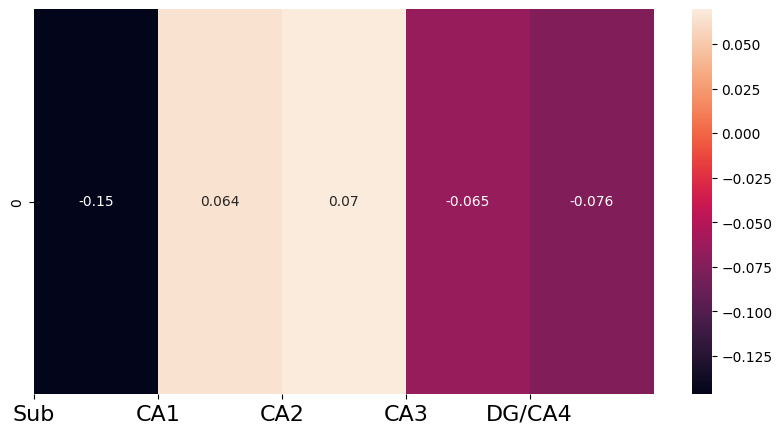

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

Rdf = pd.DataFrame(Rhold.T)
sns.heatmap(Rdf,annot=True)

ax.set_xticks((np.linspace(0,len(labels)-1,len(labels))))
ax.set_xticklabels(labels,fontsize=16)

### p-value of Pearson's R (is R sig. > 0)

[Text(0.0, 0, 'Sub'),
 Text(1.0, 0, 'CA1'),
 Text(2.0, 0, 'CA2'),
 Text(3.0, 0, 'CA3'),
 Text(4.0, 0, 'DG/CA4')]

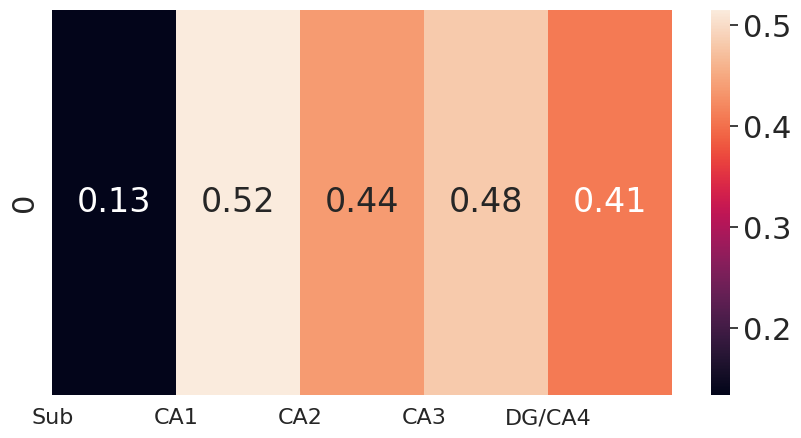

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

pval = pd.DataFrame(phold.T)
sns.heatmap(pval,annot=True)

ax.set_xticks((np.linspace(0,len(labels)-1,len(labels))))
ax.set_xticklabels(labels,fontsize=16)

## Sex analysis

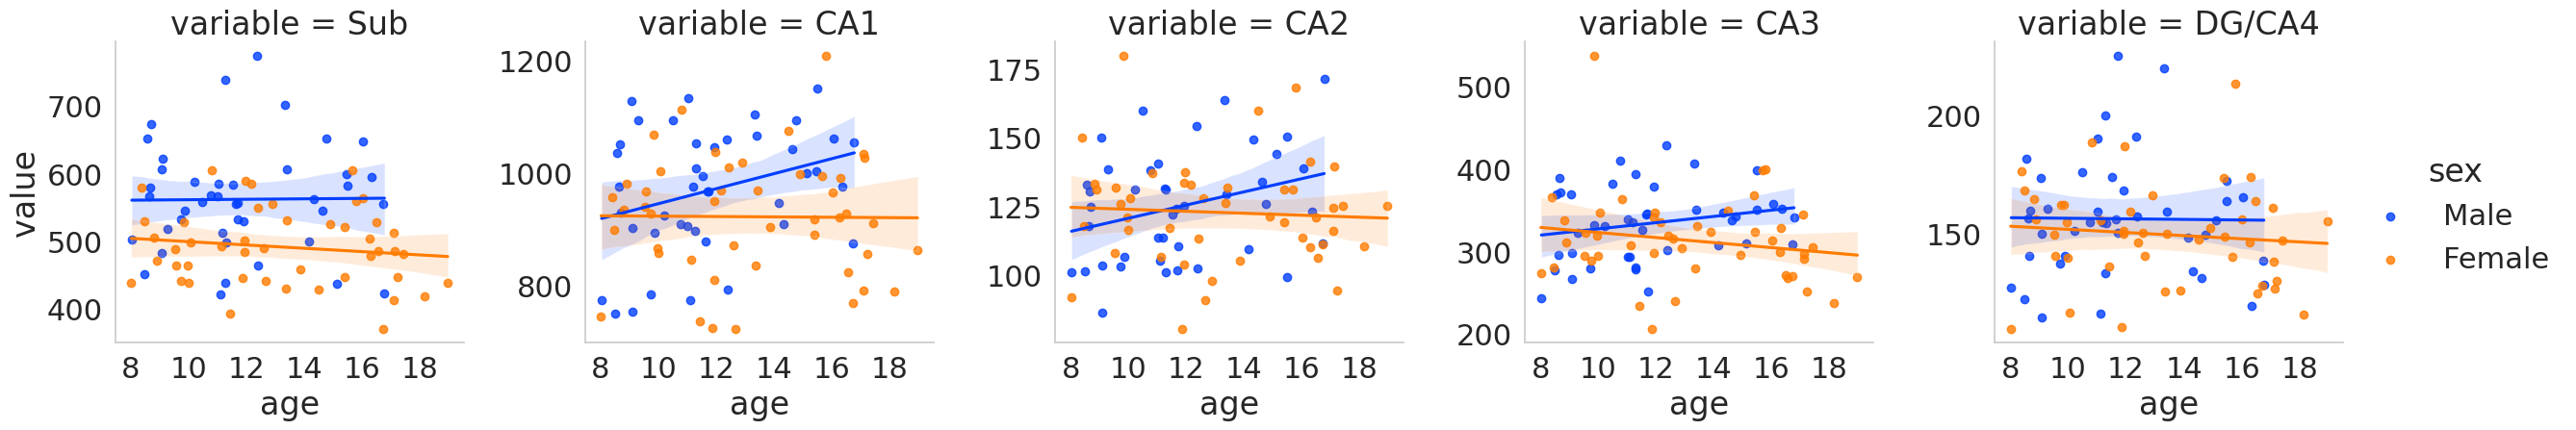

In [12]:
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})

lm = sns.lmplot(x="age", y='value', data=dfplot,col='variable',hue='sex',palette='bright',order=1,facet_kws={'sharey': False,'sharex':True})
plt.xticks([8,10,12,14,16,18]) 
plt.show()

### Nested model for sig. of age:sex interaction

In [10]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf


lm1 = smf.ols(formula='value ~ age + C(variable) + C(sex) + age:C(variable) + C(sex):C(variable)', data=dfplot).fit()
lm2 = smf.ols(formula='value ~ age + C(variable) + C(sex) + age:C(variable) + C(sex):C(variable) + age:C(sex)', data=dfplot).fit()

anovaResults = anova_lm(lm1,lm2)
print(anovaResults)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0     425.0  1.689956e+06      0.0           NaN       NaN       NaN
1     424.0  1.666257e+06      1.0  23698.592522  6.030404  0.014462


### Sig. of subfield:age interaction

In [28]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

lm1 = smf.ols(formula='value ~ age + C(sex) + C(variable) + age:C(sex) + C(sex):C(variable)', data=dfplot).fit()
lm2 = smf.ols(formula='value ~ age + C(sex) + C(variable) + age:C(sex) + C(sex):C(variable) + age:(variable)', data=dfplot).fit()

anovaResults = anova_lm(lm1,lm2)
print(anovaResults)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0     428.0  1.683633e+06      0.0           NaN       NaN       NaN
1     424.0  1.666257e+06      4.0  17375.867505  1.105377  0.353479
